<a href="https://colab.research.google.com/github/bamyers2/tantiger/blob/main/Summer2021Finalv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import csv

Using TensorFlow backend.


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train0 = pd.read_csv('gdrive/My Drive/train0.csv')
val0 = pd.read_csv('gdrive/My Drive/val0.csv')
y_train0 = pd.read_csv('gdrive/My Drive/y_train0.csv')
y_val0 = pd.read_csv('gdrive/My Drive/y_val0.csv')
test0 = pd.read_csv('gdrive/My Drive/test0.csv')
y_test0 = pd.read_csv('gdrive/My Drive/y_test0.csv')

In [5]:
train0.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,114,120,137,151,156,164,169,166,159,151,158,168,169,172,176,179,180,185,187,184,183,180,179,176,173,171,168,165,163,159,152,153,148,144,136,129,119,117,109,100,...,17,26,30,31,27,24,67,110,105,104,91,80,73,78,76,71,63,60,57,58,61,66,65,59,57,57,57,54,51,52,55,54,65,79,110,105,36,2,5,7
1,159,170,179,180,189,159,156,161,153,158,176,179,169,171,179,182,177,177,176,174,169,159,159,168,178,178,180,181,181,177,166,165,162,156,149,147,131,135,137,145,...,140,147,145,147,134,123,105,87,103,101,99,93,87,86,78,78,75,73,75,79,86,84,76,80,59,63,75,81,87,96,103,113,66,68,68,68,67,62,55,55
2,85,90,83,73,157,177,180,178,158,156,157,160,154,141,132,127,119,113,103,92,90,89,86,84,86,86,86,85,85,85,81,79,76,74,70,71,70,64,60,55,...,123,102,81,74,71,72,80,77,68,65,67,67,65,64,63,60,61,60,60,59,59,58,58,57,57,57,60,62,57,60,189,228,226,224,227,227,227,227,228,228
3,206,214,210,200,190,189,187,190,187,186,188,187,184,184,182,185,179,175,169,163,163,161,163,160,154,136,132,124,123,123,105,87,81,73,76,70,67,70,76,68,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,5,0,0
4,60,43,42,44,42,46,61,81,85,80,78,77,84,93,99,109,120,132,146,157,163,170,174,182,186,187,189,188,188,187,182,175,169,164,159,158,170,175,165,149,...,57,46,44,44,55,71,76,62,51,44,41,38,40,46,54,60,72,81,93,102,111,127,131,132,140,147,150,155,123,73,87,92,90,91,90,90,90,88,87,87


In [6]:
train0.shape[0]

787

In [7]:
train0 = train0.values.tolist()
val0 = val0.values.tolist()
y_train0 = y_train0.values.tolist()
y_val0 = y_val0.values.tolist()
test0 = test0.values.tolist()
y_test0 = y_test0.values.tolist()

In [8]:
X_train = np.array(train0)
y_train = np.array(y_train0)
X_valid = np.array(val0)
y_valid = np.array(y_val0)
X_test = np.array(test0)
y_test = np.array(y_test0)

In [9]:
X_train1 = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid1 = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test1 = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train1 = np_utils.to_categorical(y_train, num_classes = 11)
y_valid1 = np_utils.to_categorical(y_valid, num_classes = 11)
y_test1 = np_utils.to_categorical(y_test, num_classes = 11)

In [10]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [11]:
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train1, y_train1, batch_size=32, epochs=30, verbose=1, validation_data=(X_valid1, y_valid1))


Train on 787 samples, validate on 89 samples
Epoch 1/30
787/787 [==============================] - 10s 13ms/step - loss: 2.3851 - accuracy: 0.1118 - val_loss: 2.3828 - val_accuracy: 0.0562
Epoch 2/30
787/787 [==============================] - 1s 2ms/step - loss: 2.3817 - accuracy: 0.1055 - val_loss: 2.3751 - val_accuracy: 0.1011
Epoch 3/30
787/787 [==============================] - 1s 2ms/step - loss: 2.3725 - accuracy: 0.1004 - val_loss: 2.3765 - val_accuracy: 0.1011
Epoch 4/30
787/787 [==============================] - 1s 2ms/step - loss: 2.3716 - accuracy: 0.1029 - val_loss: 2.3775 - val_accuracy: 0.1011
Epoch 5/30
787/787 [==============================] - 1s 2ms/step - loss: 2.3674 - accuracy: 0.1334 - val_loss: 2.3792 - val_accuracy: 0.0562
Epoch 6/30
787/787 [==============================] - 1s 2ms/step - loss: 2.3659 - accuracy: 0.1220 - val_loss: 2.3760 - val_accuracy: 0.1011
Epoch 7/30
787/787 [==============================] - 1s 2ms/step - loss: 2.3674 - accuracy: 0.1258 

In [13]:
Y_test1 = np.argmax(y_test1, axis=1)
y_pred1 = model.predict_classes(X_test1)
target_names = ['1-2', '3-9', '10-20', '21-25', '26-27', '28-31', '32-36', '37-45', '46-54', '55-65', '66-116']
print(classification_report(Y_test1, y_pred1, target_names = target_names))

              precision    recall  f1-score   support

         1-2       0.00      0.00      0.00      1310
         3-9       0.00      0.00      0.00      1174
       10-20       0.00      0.00      0.00      1460
       21-25       0.12      1.00      0.21      2197
       26-27       0.00      0.00      0.00      2237
       28-31       0.00      0.00      0.00      2061
       32-36       0.00      0.00      0.00      2060
       37-45       0.00      0.00      0.00      1996
       46-54       0.00      0.00      0.00      1573
       55-65       0.00      0.00      0.00      1527
      66-116       0.00      0.00      0.00      1368

    accuracy                           0.12     18963
   macro avg       0.01      0.09      0.02     18963
weighted avg       0.01      0.12      0.02     18963



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
cm = confusion_matrix(y_test1.argmax(axis=1), y_pred1)
print(cm)

[[   0    0    0 1310    0    0    0    0    0    0    0]
 [   0    0    0 1174    0    0    0    0    0    0    0]
 [   0    0    0 1460    0    0    0    0    0    0    0]
 [   0    0    0 2197    0    0    0    0    0    0    0]
 [   0    0    0 2237    0    0    0    0    0    0    0]
 [   0    0    0 2061    0    0    0    0    0    0    0]
 [   0    0    0 2060    0    0    0    0    0    0    0]
 [   0    0    0 1996    0    0    0    0    0    0    0]
 [   0    0    0 1573    0    0    0    0    0    0    0]
 [   0    0    0 1527    0    0    0    0    0    0    0]
 [   0    0    0 1368    0    0    0    0    0    0    0]]


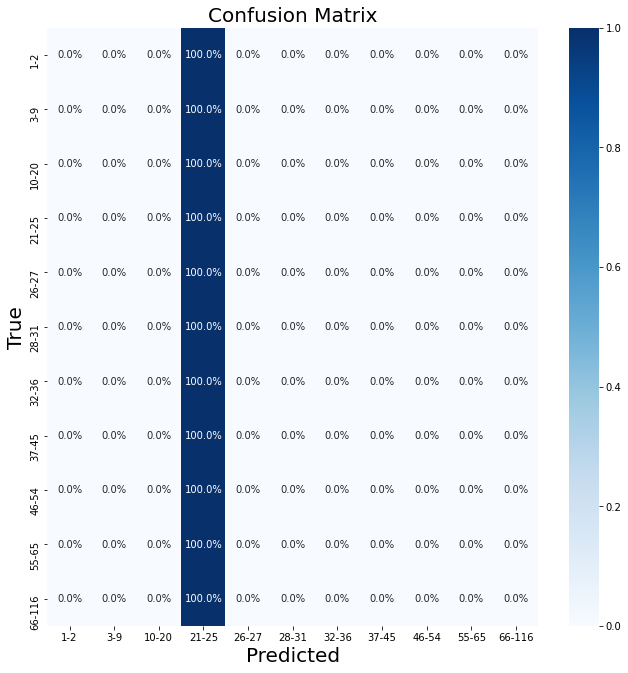

In [15]:
fig,ax= plt.subplots(figsize=(11,11))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
#sns.heatmap(cm, annot=True, fmt='.0f',cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);

In [16]:
pred = model.predict(X_test1)
pred1 = np.where(pred==1)
TP_Indexes = []
for k in pred1[0]:
    if(y_test1[k][0] == 1):
        TP_Indexes.append(k)
X_test1_TP = X_test1[TP_Indexes]

In [17]:
aa = pd.DataFrame(y_pred1)
# aa2 = pd.DataFrame(pred1)
# aa3 = pd.DataFrame(TP_Indexes)
# aa4 = pd.DataFrame(X_test1_TP)

In [18]:
aa.head()

,0
0,3
1,3
2,3
3,3
4,3


In [19]:
aaFinal = pd.DataFrame(y_test1)

In [20]:
aaFinal[0].values[1]

0.0

In [21]:
aaFinal['aa'] = aa[0]

In [22]:
aaFinal.head()

,0,1,2,3,4,5,6,7,8,9,10,aa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [23]:
def label_age (row):
    if row[row['aa']] == 1.0:
        return 1
    else:
        return 0

In [24]:
aaFinal['YorN'] = aaFinal.apply (lambda row: label_age(row), axis=1)

In [25]:
aaFinal.head()

,0,1,2,3,4,5,6,7,8,9,10,aa,YorN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0


In [26]:
aaFinal.shape[0]

18963

In [27]:
X_test22 = X_test.tolist()

In [28]:
con = 0
for i in range(aaFinal.shape[0]-1):
    if aaFinal['YorN'].values[i] == 0:
        X_test22.remove(X_test22[i-con])
        con += 1

In [29]:
X_test22 = np.array(X_test22)

In [30]:
X_test22[0]

array([ 24,  36,  40, ..., 181, 157, 154])

In [31]:
X_test[1]

array([ 75,  85, 100, ...,  71,  82,  77])

In [32]:
X_test22 = X_test22.tolist()

In [33]:
X_test23 = X_test22

In [34]:
len(X_test22)

2198

In [35]:
div = int(round(len(X_test22) * .1, 0))

In [36]:
div

220

In [37]:
val = random.sample(X_test22, div)

In [38]:
train1 = []

for i in X_test22:
    if i not in val:
        train1.append(i)

In [39]:
val1 = []

for i in X_test22:
    if i in val:
        val1.append(i)

In [40]:
len(train1)/len(val1)

8.725663716814159

In [41]:
y_test22 = y_test.tolist()

In [42]:
y_train1 = []
y_val1 = []

for i in val1:
    y_val1.append(y_test22[X_test23.index(i)])

for i in train1:
    y_train1.append(y_test22[X_test23.index(i)])

In [43]:
len(y_train1)/len(y_val1)

8.725663716814159

In [44]:
train1 = pd.DataFrame(train1)
val1 = pd.DataFrame(val1)
y_train1 = pd.DataFrame(y_train1)
y_val1 = pd.DataFrame(y_val1)

In [45]:
train1.to_csv('train1.csv', index=False)
val1.to_csv('val1.csv', index=False)
y_train1.to_csv('y_train1.csv', index=False)
y_val1.to_csv('y_val1.csv', index=False)

In [46]:
X_test = X_train.tolist()
y_test = y_train.tolist()

test1 = pd.DataFrame(X_test)
y_test1 = pd.DataFrame(y_test)

In [47]:
test1.to_csv('test1.csv', index=False)
y_val1.to_csv('y_val1.csv', index=False)
y_test1.to_csv('y_test1.csv', index=False)

In [48]:
len(X_test)/len(y_test)
#should be 1

1.0

In [49]:
this is an error

SyntaxError: ignored

In [ ]:
X_train = np.array(train0)
y_train = np.array(y_train0)
X_valid = np.array(val0)
y_valid = np.array(y_val0)
X_test = np.array(X_train)
y_test = np.array(y_train)

X_train1 = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid1 = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test1 = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train1 = np_utils.to_categorical(y_train, num_classes = 11)
y_valid1 = np_utils.to_categorical(y_valid, num_classes = 11)
y_test1 = np_utils.to_categorical(y_test, num_classes = 11)

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

In [ ]:
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train1, y_train1, batch_size=2, epochs=30, verbose=1, validation_data=(X_valid1, y_valid1))

In [ ]:
Y_test1 = np.argmax(y_test1, axis=1)
y_pred1 = model.predict_classes(X_test1)
target_names = ['1-2', '3-9', '10-20', '21-25', '26-27', '28-31', '32-36', '37-45', '46-54', '55-65', '66-116']
print(classification_report(Y_test1, y_pred1, target_names = target_names))

In [ ]:
cm = confusion_matrix(y_test1.argmax(axis=1), y_pred1)
print(cm)

In [ ]:
fig,ax= plt.subplots(figsize=(11,11))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
#sns.heatmap(cm, annot=True, fmt='.0f',cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);

In [ ]:
#con = 0
#for i in range(aaFinal.shape[0]-1):
#    if aaFinal['YorN'].values[i] == 0:
#        X_test = np.delete(X_test, i-con)
#        con += 1